In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("D:\\DataSets\\mushrooms.csv")

In [8]:
# Display the first few rows of the dataframe
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w    

In [9]:
# Get information about the dataset
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-col

In [10]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [13]:
for col in df.columns:
    print(col,":",df[col].unique())

class : ['p' 'e']
cap-shape : ['x' 'b' 's' 'f' 'k' 'c']
cap-surface : ['s' 'y' 'f' 'g']
cap-color : ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises : ['t' 'f']
odor : ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment : ['f' 'a']
gill-spacing : ['c' 'w']
gill-size : ['n' 'b']
gill-color : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape : ['e' 't']
stalk-root : ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring : ['s' 'f' 'k' 'y']
stalk-surface-below-ring : ['s' 'f' 'y' 'k']
stalk-color-above-ring : ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring : ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type : ['p']
veil-color : ['w' 'n' 'o' 'y']
ring-number : ['o' 't' 'n']
ring-type : ['p' 'e' 'l' 'f' 'n']
spore-print-color : ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population : ['s' 'n' 'a' 'v' 'y' 'c']
habitat : ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [14]:
# Count the number of '?' in 'stalk-root'
print(f"\nNumber of '?' in 'stalk-root': {df['stalk-root'].value_counts()['?']}")


Number of '?' in 'stalk-root': 2480


In [15]:
# It looks like '?' is a placeholder for missing data.
# I am going to replace '?' with the mode of the column.
stalk_root_mode = df['stalk-root'].mode()[0]
df['stalk-root'] = df['stalk-root'].replace('?', stalk_root_mode)

In [16]:
print("\nUnique values in 'stalk-root' column after replacing '?':")
print(df['stalk-root'].unique())


Unique values in 'stalk-root' column after replacing '?':
['e' 'c' 'b' 'r']


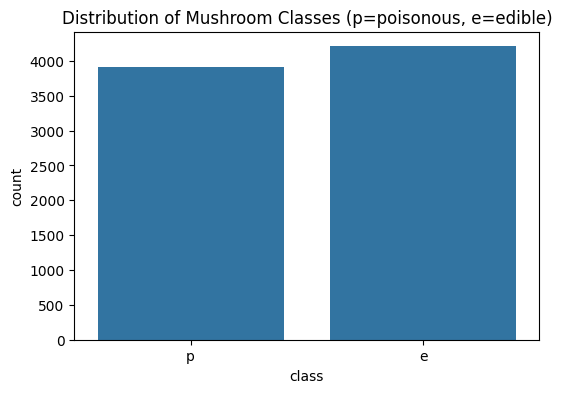

In [17]:
# Visualize the distribution of the target variable 'class'
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df)
plt.title('Distribution of Mushroom Classes (p=poisonous, e=edible)')
plt.savefig('class_distribution.png')

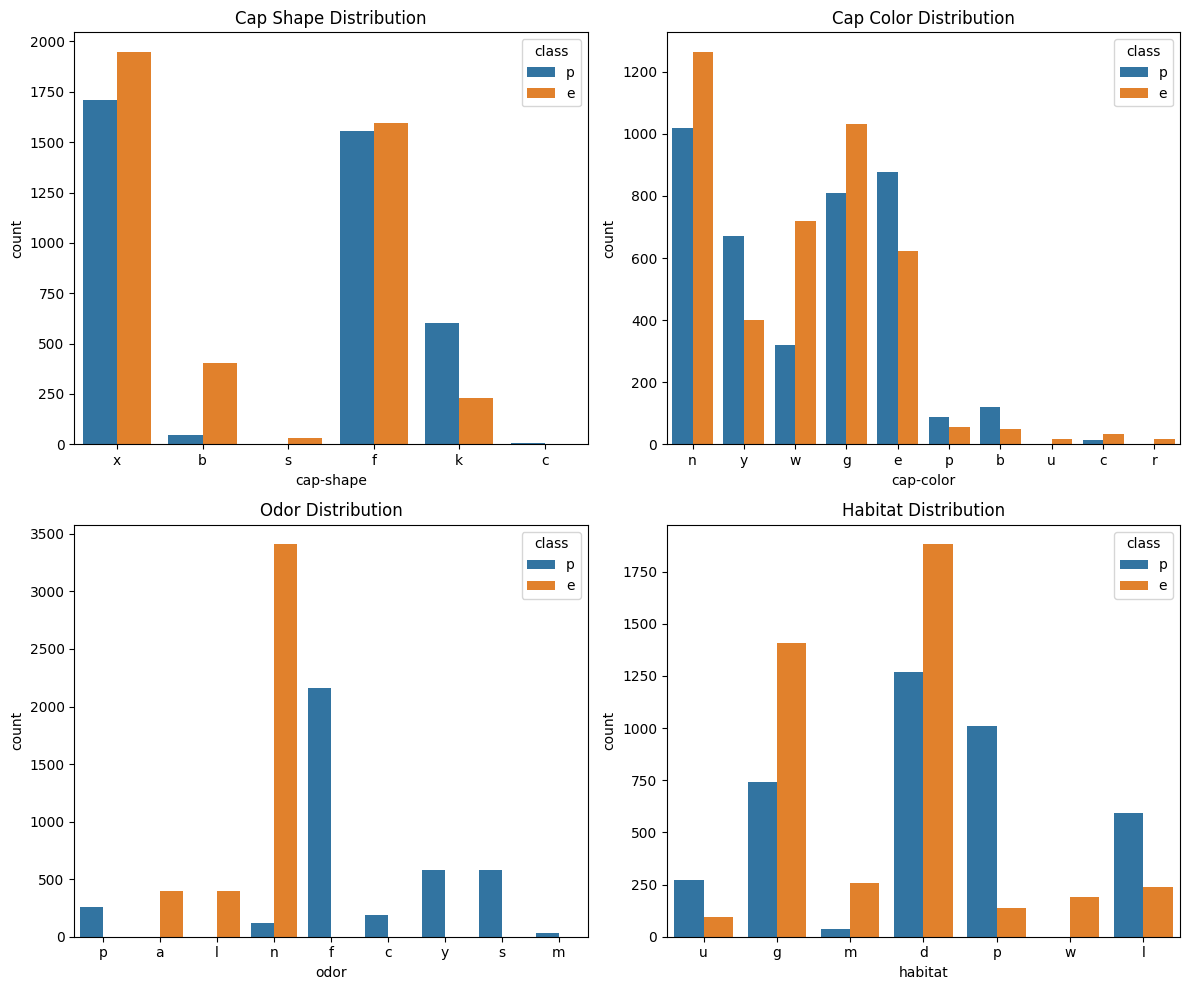

In [18]:
# Visualize the distribution of a few other features
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.countplot(ax=axes[0, 0], x='cap-shape', data=df, hue='class')
axes[0, 0].set_title('Cap Shape Distribution')
sns.countplot(ax=axes[0, 1], x='cap-color', data=df, hue='class')
axes[0, 1].set_title('Cap Color Distribution')
sns.countplot(ax=axes[1, 0], x='odor', data=df, hue='class')
axes[1, 0].set_title('Odor Distribution')
sns.countplot(ax=axes[1, 1], x='habitat', data=df, hue='class')
axes[1, 1].set_title('Habitat Distribution')
plt.tight_layout()

# Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe for encoding
encoded_df = df.copy()

# Encode categorical features
label_encoder = LabelEncoder()
for column in encoded_df.columns:
    encoded_df[column] = label_encoder.fit_transform(encoded_df[column])

# Display the first few rows of the encoded dataframe
print("First 5 rows of the encoded dataset:")
print(encoded_df.head())

First 5 rows of the encoded dataset:
   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring

Text(0.5, 1.0, 'Correlation Matrix of Mushroom Features')

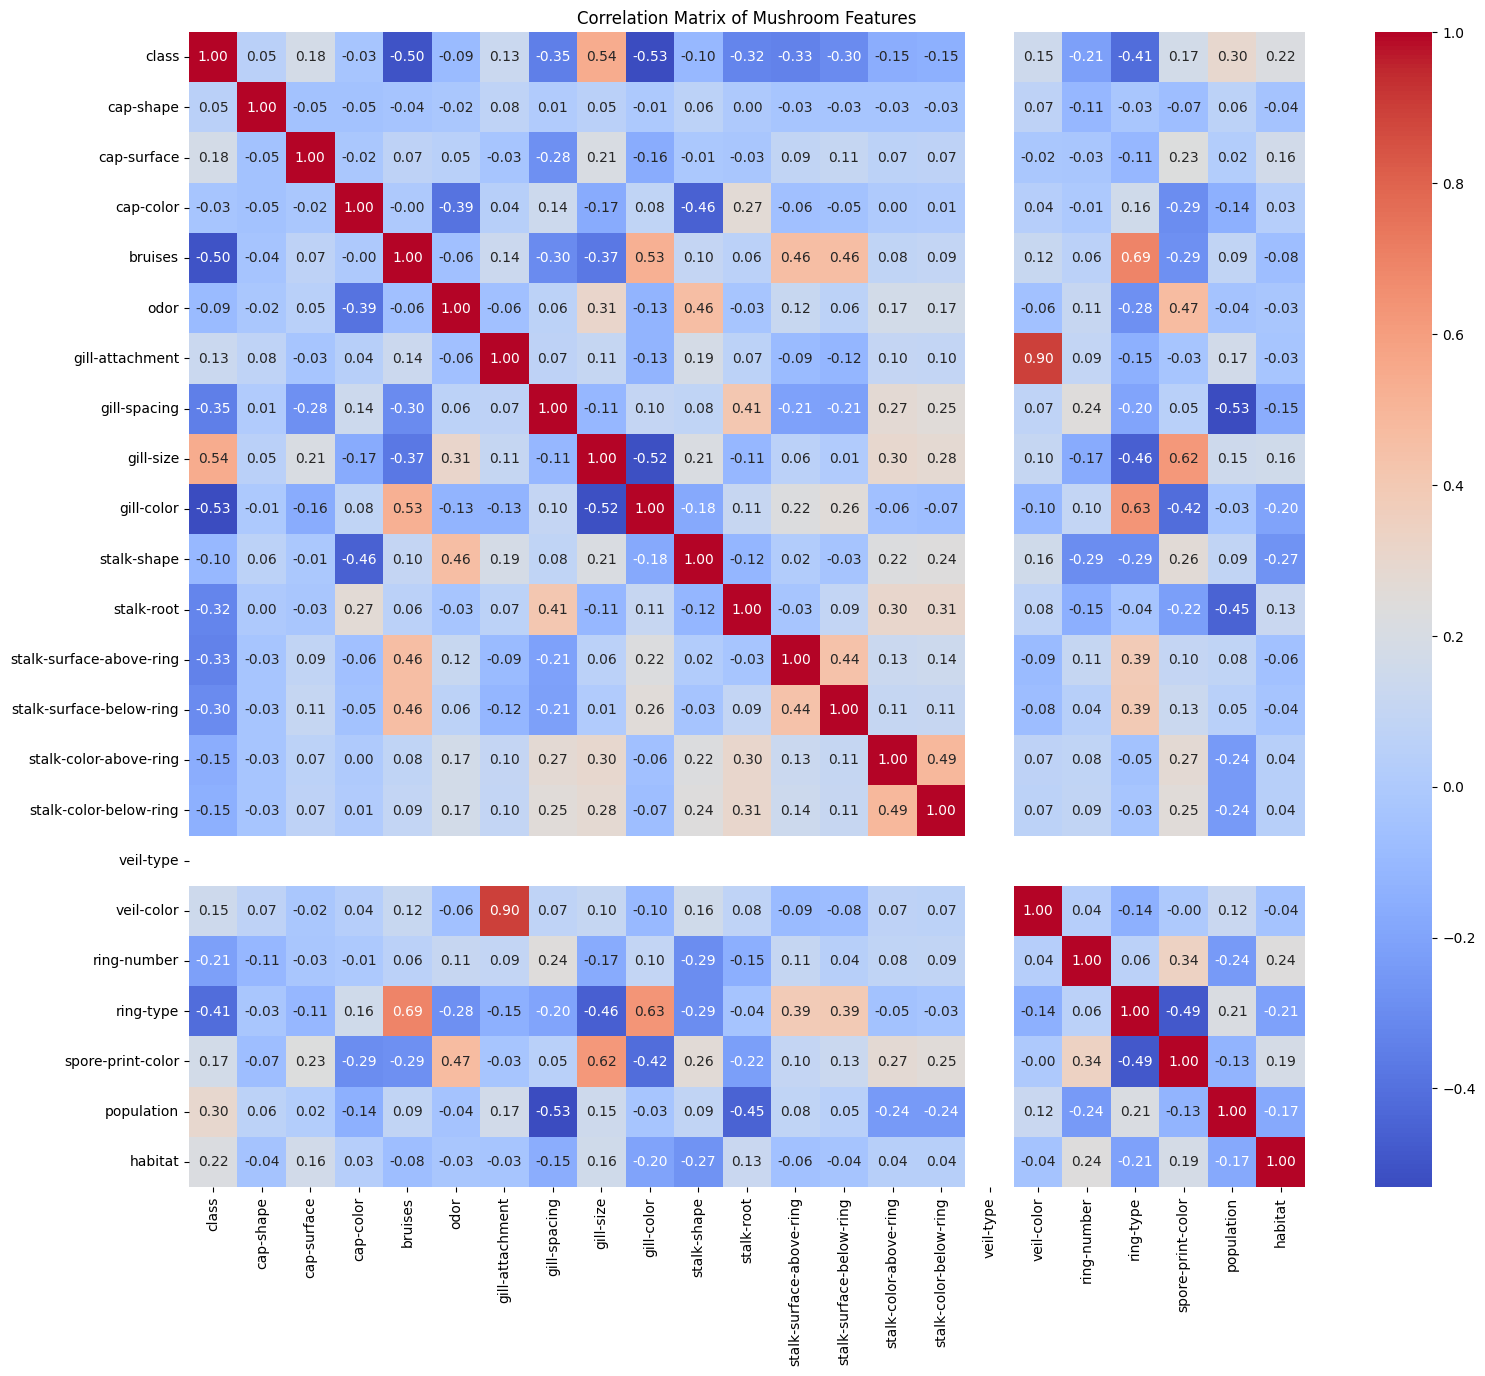

In [21]:
# Calculate the correlation matrix
correlation_matrix = encoded_df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Mushroom Features')

we can drop veil-type because it contributes nothing for prediction of poisionous or edible mushroom.


In [22]:
# Get the correlation of each feature with the 'class' column
class_correlation = correlation_matrix['class'].sort_values(ascending=False)

print("\nCorrelation of each feature with the 'class' column:")
print(class_correlation)


Correlation of each feature with the 'class' column:
class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-root                 -0.324194
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64
